<a href="https://colab.research.google.com/github/CodeAlamin2024/DSA210_PROJECT/blob/main/DSA210_PROJECT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


EXPLORING SOLANA PRICE DATA

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

path = "/content/drive/MyDrive/solana_price_data_cleaned.csv"

df = pd.read_csv(path)

print(df.isnull().sum())

print(df.describe())

DATE            0
PRICE           0
MARKET CAP      0
TOTAL VOLUME    0
dtype: int64
             PRICE    MARKET CAP  TOTAL VOLUME
count  1801.000000  1.801000e+03  1.801000e+03
mean     73.559289  2.945894e+10  1.873597e+09
std      71.197934  3.135231e+10  2.496845e+09
min       0.510000  4.171226e+06  5.489101e+05
25%      18.800000  6.825332e+09  2.959296e+08
50%      36.720000  1.192497e+10  1.097685e+09
75%     138.410000  5.326129e+10  2.617149e+09
max     262.560000  1.277852e+11  2.774541e+10


VISUALIZING SOLANA'S HISTORICAL PERFORMANCE

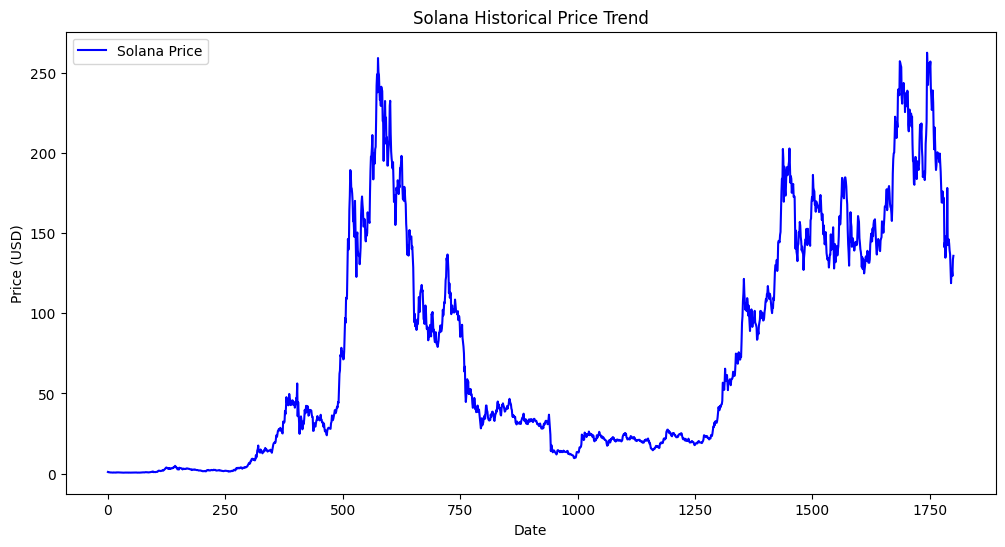

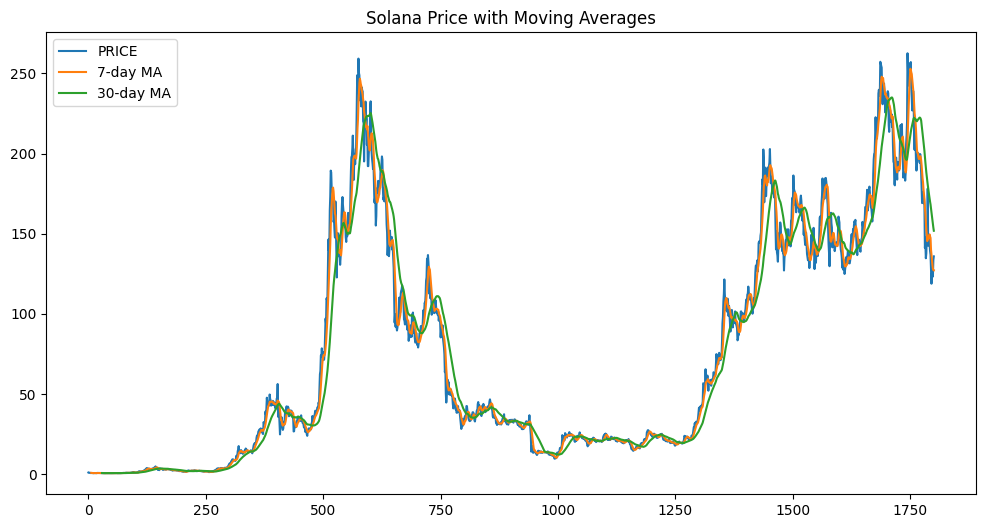

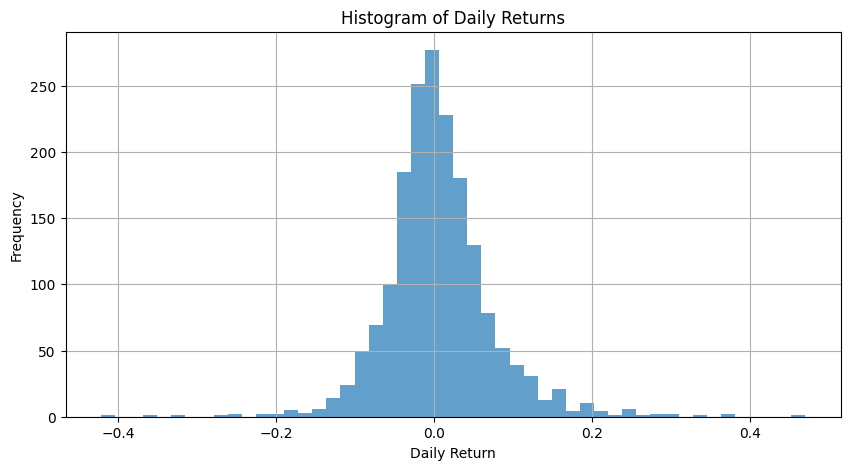

In [ ]:
plt.figure(figsize=(12, 6))
plt.plot(df["PRICE"], label="Solana Price", color="blue")
plt.title("Solana Historical Price Trend")
plt.xlabel("Date")
plt.ylabel("Price (USD)")
plt.legend()
plt.show()

df["7-day MA"] = df["PRICE"].rolling(window=7).mean()
df["30-day MA"] = df["PRICE"].rolling(window=30).mean()

df[["PRICE", "7-day MA", "30-day MA"]].plot(figsize=(12, 6))
plt.title("Solana Price with Moving Averages")
plt.show()

df["Daily Return"] = df["PRICE"].pct_change()

df["Daily Return"].hist(bins=50, figsize=(10, 5), alpha=0.7)
plt.title("Histogram of Daily Returns")
plt.xlabel("Daily Return")
plt.ylabel("Frequency")
plt.show()

The histogram shows the distribution of Solana's daily price changes:

- Most daily returns cluster around 0.0, indicating many days with minimal price movement.
- The distribution appears roughly symmetrical with tails extending to approximately -0.4 and +0.4.
- This suggest Solana experiences moderate volatility, with occasional larger price swings in both directions.

EXTERNAL FACTORS INFLUENCING SOLANA

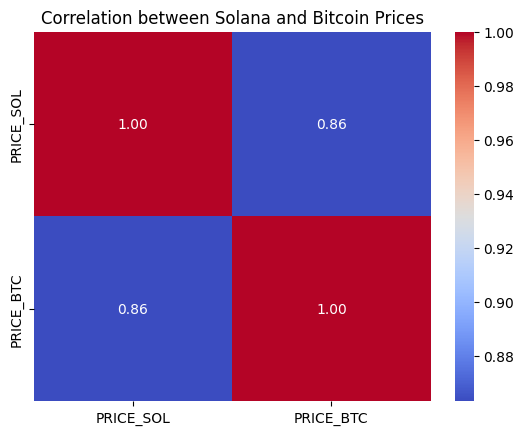

In [ ]:
path2 = "/content/drive/MyDrive/bitcoin_price_data_cleaned.csv"

sol_df = pd.read_csv(path, parse_dates=["DATE"], index_col="DATE")
btc_df = pd.read_csv(path2, parse_dates=["DATE"], index_col="DATE")

sol_df["PRICE"] = pd.to_numeric(sol_df["PRICE"], errors="coerce")
btc_df["PRICE"] = pd.to_numeric(btc_df["PRICE"], errors="coerce")

merged_df = sol_df[["PRICE"]].merge(btc_df[["PRICE"]], left_index=True, right_index=True, suffixes=("_SOL", "_BTC"))

import seaborn as sns
import matplotlib.pyplot as plt

sns.heatmap(merged_df.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation between Solana and Bitcoin Prices")
plt.show()


COMPARATIVE EVALUATION WITH OTHER CRYPTOCURRENCIES

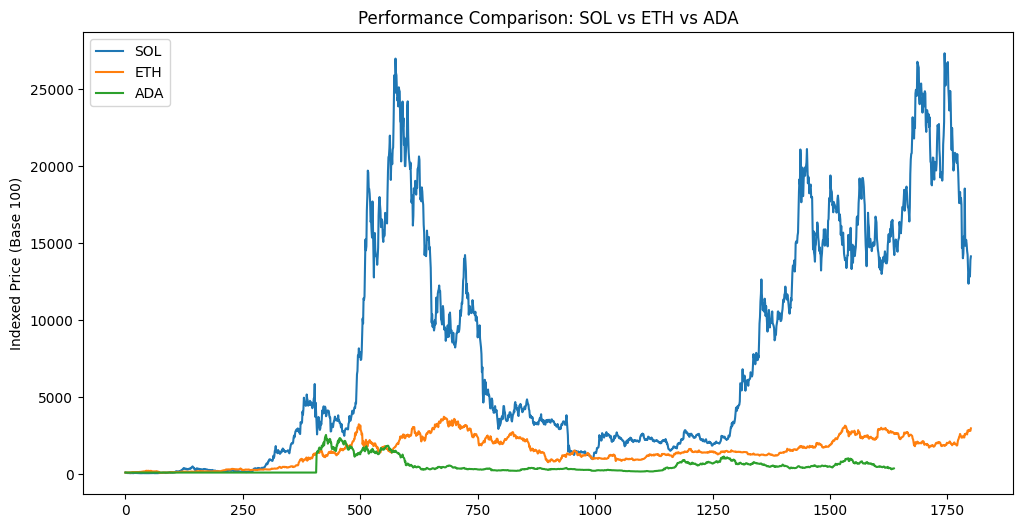

In [ ]:
path_eth = "/content/drive/MyDrive/Colab Notebooks/optimized_ethereum_price_data.csv"
path_ada = "/content/drive/MyDrive/Colab Notebooks/optimized_avalanche_price_data.csv"
eth_df = pd.read_csv(path_eth)
ada_df = pd.read_csv(path_ada)

crypto_df = df[["PRICE"]].rename(columns={"PRICE": "SOL"})
crypto_df["ETH"] = eth_df["price"]
crypto_df["ADA"] = ada_df["price"]

crypto_df = (crypto_df / crypto_df.iloc[0]) * 100

crypto_df.plot(figsize=(12, 6))
plt.title("Performance Comparison: SOL vs ETH vs ADA")
plt.ylabel("Indexed Price (Base 100)")
plt.show()

FUTURE GROWTH POTENTIAL OF SOLANA

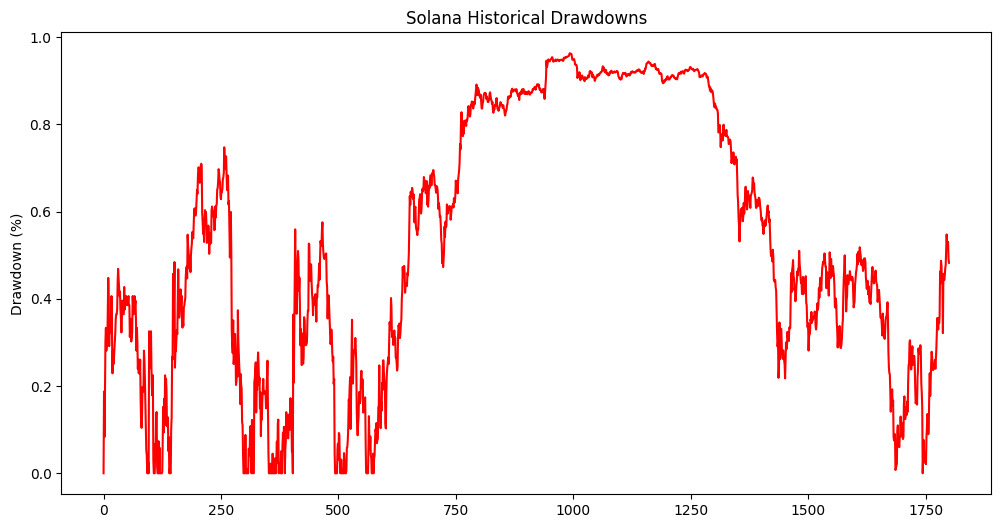

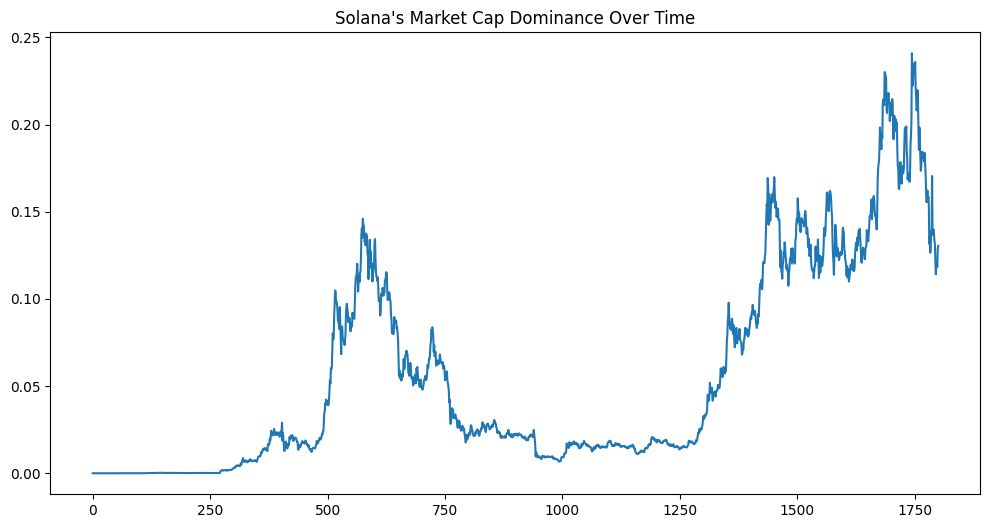

In [ ]:
df["Rolling Max"] = df["PRICE"].cummax()
df["Drawdown"] = (df["Rolling Max"] - df["PRICE"]) / df["Rolling Max"]

df["Drawdown"].plot(figsize=(12, 6), color="red")
plt.title("Solana Historical Drawdowns")
plt.ylabel("Drawdown (%)")
plt.show()

df["Market Cap Dominance"] = (df["MARKET CAP"] / df["MARKET CAP"].sum()) * 100
df["Market Cap Dominance"].plot(figsize=(12, 6))
plt.title("Solana's Market Cap Dominance Over Time")
plt.show()